In [59]:
# Question 2c, Part (i)

import numpy as np
import matplotlib.pyplot as plt

color_cycles = ['red', 'green', 'blue', 'orange', 'yellow']

def Lloyds_Algorithm(dat, k):
    n = dat.shape[1]
    
    # each column represents the coordinates of a initial cluster assignment
    c = np.random.uniform(-3,3,(2,k))
    c_old = np.copy(c)
    c_old[0,0] = c[0,0] + 1
    iternum = 0

    # run Lloyd's algorithm
    while (not np.all(c_old == c)):
        iternum += 1
        print('Iteration ' + str(iternum))
        c_old = np.copy(c)

        splits = {}
        distances = np.ones((k,n))
        for i in range(k):
            distances[i] = np.linalg.norm(dat - c[:,i].reshape((2,1)), axis = 0)

        closest_to = np.argmin(distances, axis = 0)
        seq = np.linspace(0,n-1,n).astype(int)

        for i in range(k):
            closest_to_index = [j for j in range(n) if (closest_to[j] == i)]
            splits[i] = dat[:,closest_to_index]

        # plot results
        fig = plt.figure(figsize=(5,5))
        for i in range(k):
            plt.scatter(c[0,i],c[1,i], marker = 'x', color = 'black')
            plt.scatter(np.array(splits[i])[0],np.array(splits[i])[1], color = color_cycles[i])
        plt.show()

        # update cluster points
        for i in range(k):
            if (len(splits[i]) > 0):
                c[:,i] = np.array(np.mean(splits[i], axis = 1).T)

###############################################################################
            
# Example 1 - Concentric circles

# Parameters
# number of points on each circle
N1 = 15
# radii of circles
r1 = 1
r2 = 4
# number of clusters
k1 = 2

# generate the data
x1 = np.append(r1*np.cos(np.linspace(0,2*np.pi*(N1-1)/N1,N1)),r2*np.cos(np.linspace(0,2*np.pi*(N1-1)/N1,N1)))
y1 = np.append(r1*np.sin(np.linspace(0,2*np.pi*(N1-1)/N1,N1)),r2*np.sin(np.linspace(0,2*np.pi*(N1-1)/N1,N1)))
data_ex1 = np.matrix([x1,y1])

###############################################################################

# Example 2 - Two Parabolic Segments

# Parameters
# number of points on each branch
N2_dense = 10
N2_sparse = 20
N2 = N2_dense + N2_sparse
# vertical overlap
v_ovlp = 0.1
# number of clusters
k2 = 2

# generate the data
x2 = np.array((np.linspace(-4,-3.6,N2_dense).tolist() + np.linspace(-3.5,4,N2_sparse).tolist()) +
               (np.linspace(-4,3.5,N2_sparse).tolist() + np.linspace(3.6,4,N2_dense).tolist()))
y2 = np.append(np.sqrt(x2[:N2] + 4) - v_ovlp/2, -np.sqrt(4 - x2[N2:2*N2]) + v_ovlp/2)
data_ex2 = np.matrix([x2,y2])

###############################################################################

# Example 3 - Parabolic clusters

# Parameters
# number of points in each cluster
N3 = 20
# number of clusters
k3 = 2

# generate the data
cluster1x = np.linspace(-5,5,N3)
cluster2x = np.linspace(-1,1,N3)
cluster1y = 0.25*cluster1x*cluster1x - 4
cluster2y = cluster2x*cluster2x
x3 = np.append(cluster1x, cluster2x)
y3 = np.append(cluster1y, cluster2y)
data_ex3 = np.matrix([x3,y3])

Desired clusters


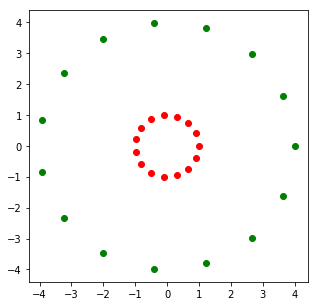

Iteration 1


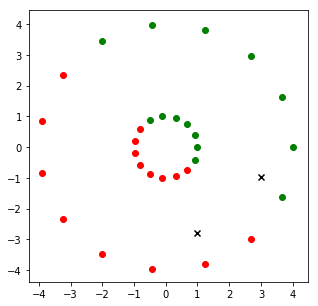

Iteration 2


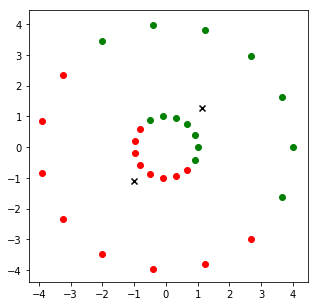

Desired clusters


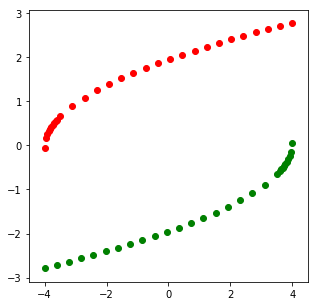

Iteration 1


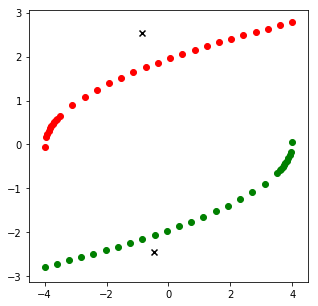

Iteration 2


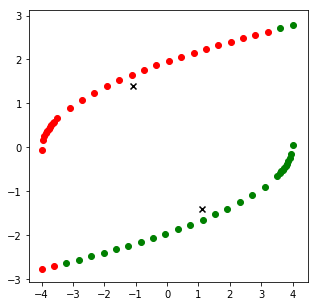

Iteration 3


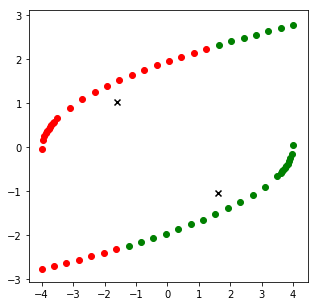

Iteration 4


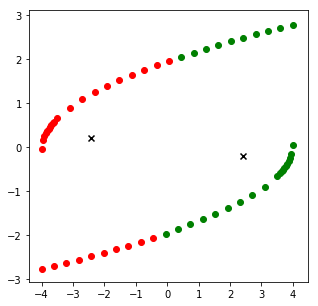

Iteration 5


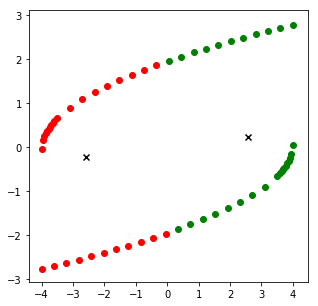

Iteration 6


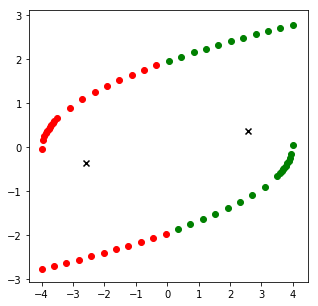

Desired clusters


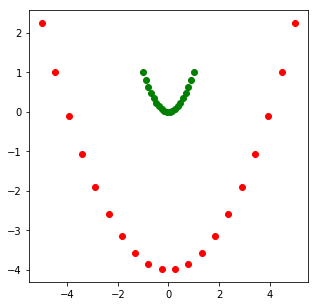

Iteration 1


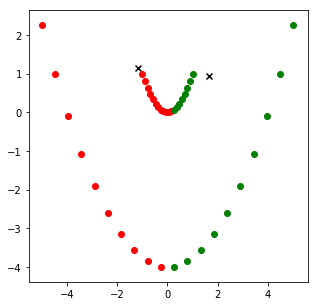

Iteration 2


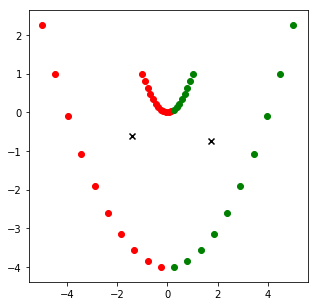

In [60]:
# Question 2c, Part (i)

# plot the desired clusters for Example 1
print('Desired clusters')
fig = plt.figure(figsize=(5,5))
for i in range(k1):
    plt.scatter(x1[i*N1:(i+1)*N1],y1[i*N1:(i+1)*N1], color = color_cycles[i])
plt.show()

# run Lloyd's algorithm and plot each iteration
Lloyds_Algorithm(data_ex1, k1)

# plot the desired clusters for Example 2
print('Desired clusters')
fig = plt.figure(figsize=(5,5))
for i in range(k2):
    plt.scatter(x2[i*N2:(i+1)*N2],y2[i*N2:(i+1)*N2], color = color_cycles[i])
plt.show()

# run Lloyd's algorithm and plot each iteration
Lloyds_Algorithm(data_ex2, k2)

# plot the desired clusters for Example 3
print('Desired clusters')
fig = plt.figure(figsize=(5,5))
for i in range(k3):
    plt.scatter(x3[i*N3:(i+1)*N3],y3[i*N3:(i+1)*N3], color = color_cycles[i])
plt.show()

# run Lloyd's algorithm and plot each iteration
Lloyds_Algorithm(data_ex3, k3)

Example 1 - Concentric Circles


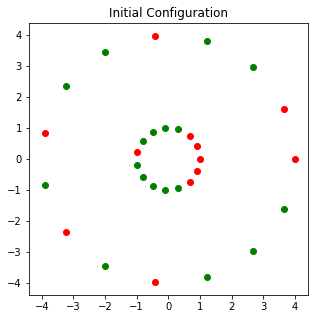

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


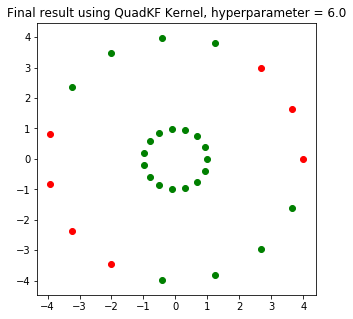

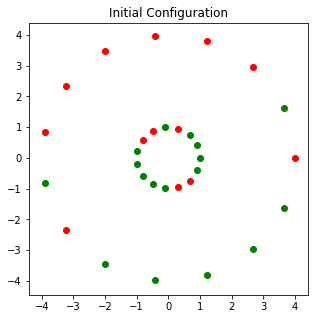

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


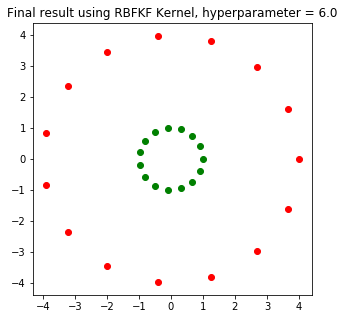

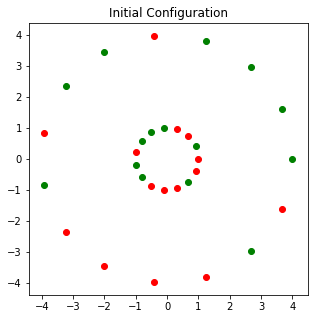

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2


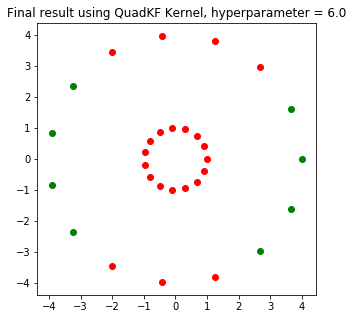

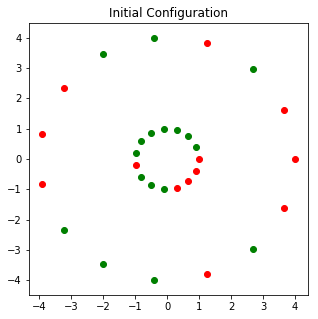

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2


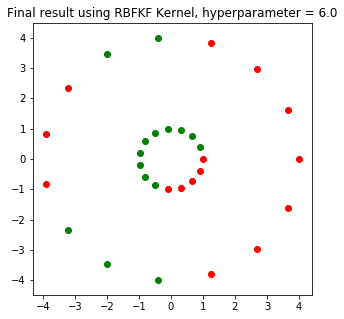

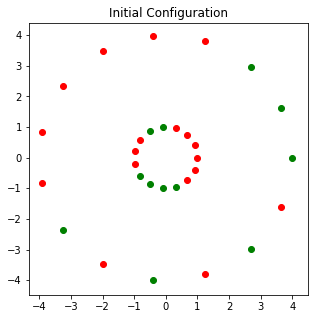

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


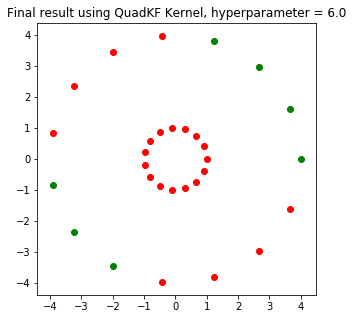

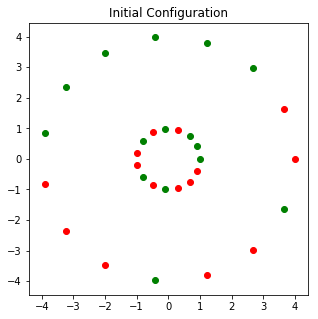

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2


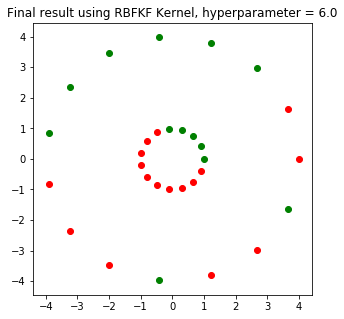

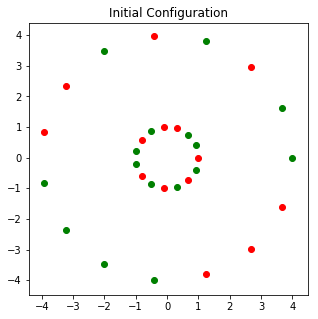

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


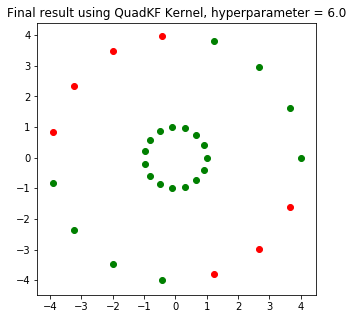

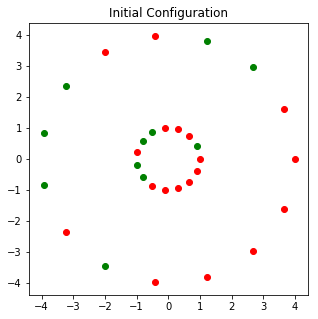

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2


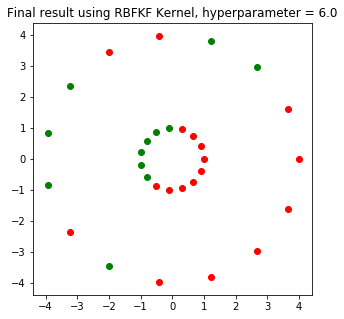

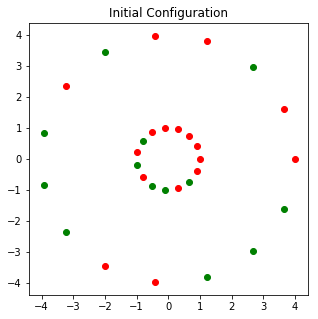

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2


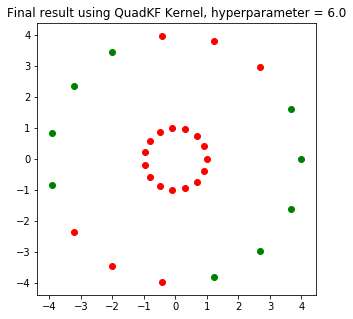

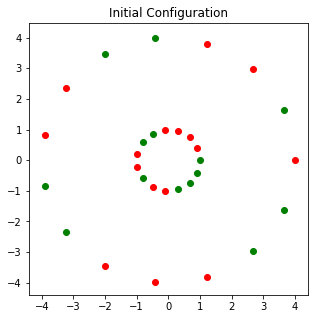

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2


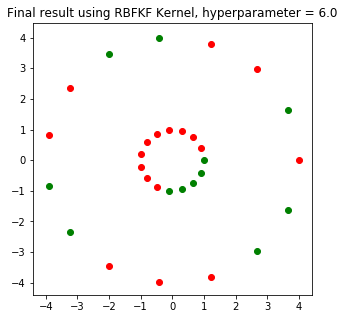

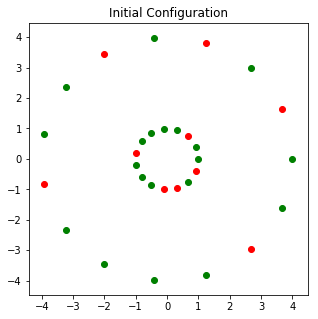

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


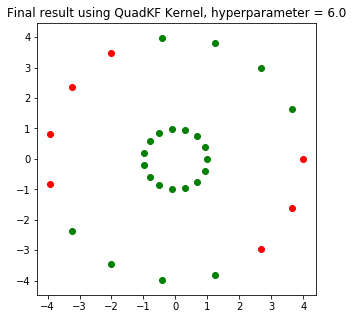

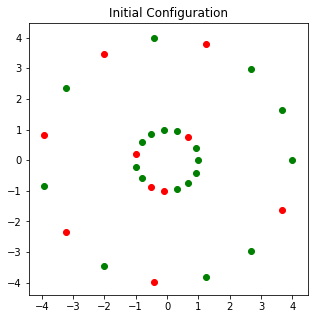

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


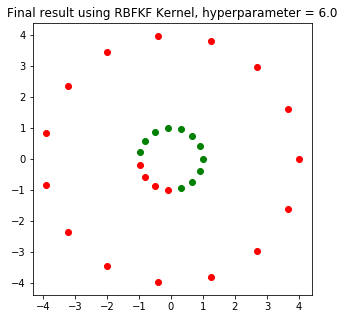

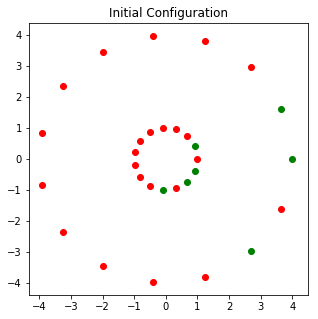

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


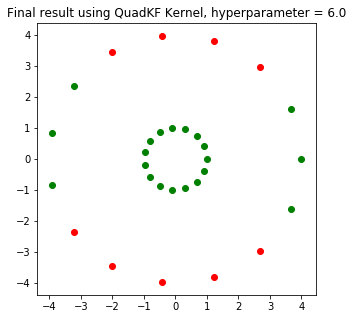

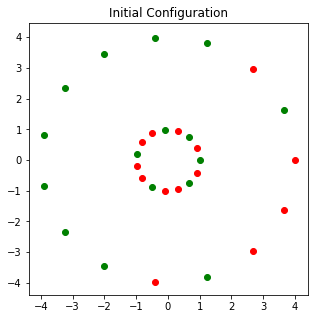

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


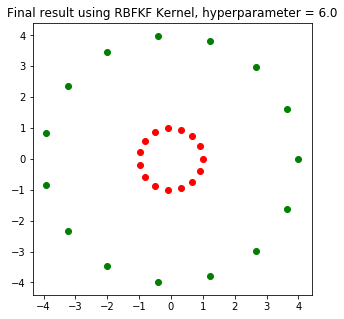

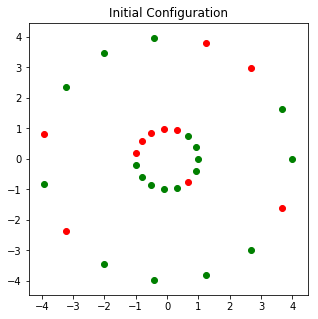

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2


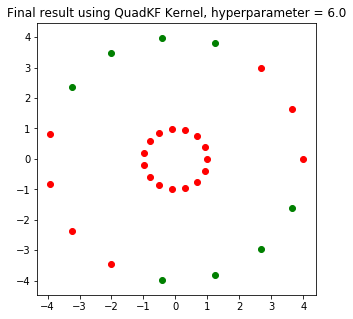

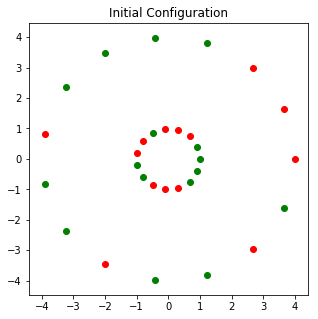

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


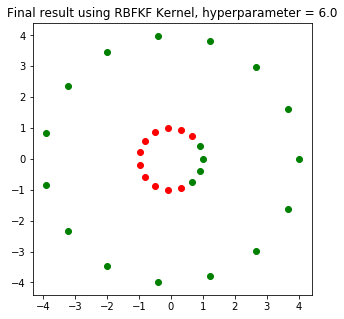

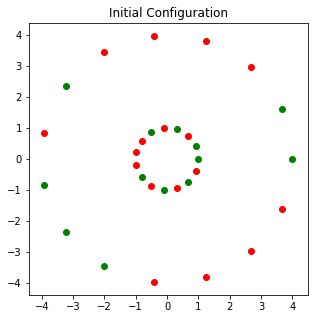

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


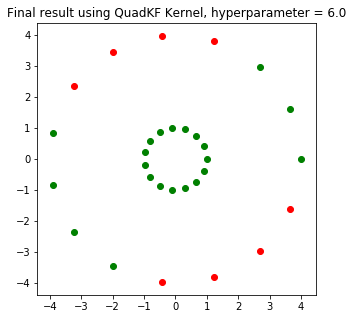

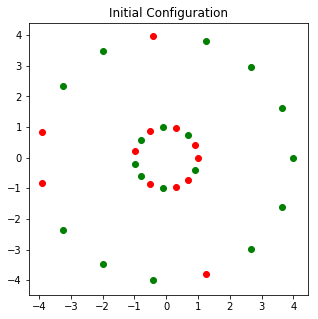

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


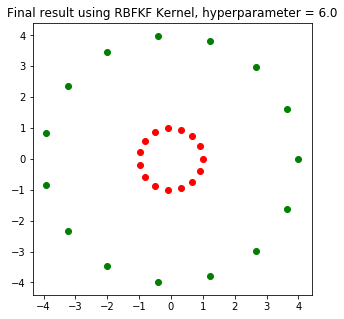

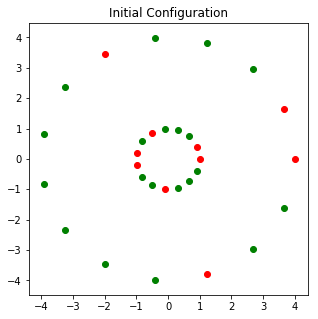

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


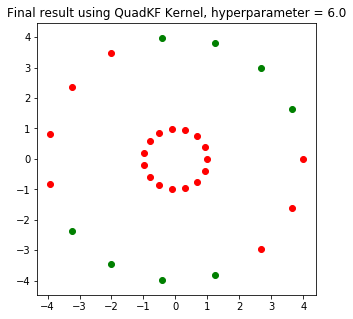

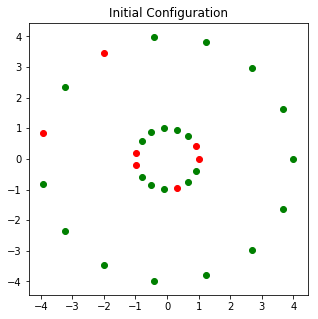

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


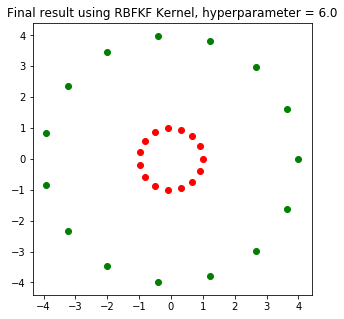

In [64]:
# Question 2c, Part (vi)

def KernelizedLloyd(kf, dat, k, hyperparam = 0.0, random_init = True, z_init = None):
    n = dat.shape[1]
    
    if (random_init):
        # random initialization
        z = np.zeros((n,k))
        for i in range(n):
            z[i,int(np.random.uniform(0,k))] = 1
    else:
        z = z_init

    alpha = z/np.sum(z, axis = 0)
    zp = np.copy(z)
    zp[0,0] = z[0,0] + 1
    iternum = 0
    
    # default configuration given as follows:
    # z = np.array([1,0]*int(n/2) + [0,1]*int(n/2)).reshape((n,k))
    
    # plot initial configuration 
    fig = plt.figure(figsize=(5,5))
    for i in range(k):
        ind = np.where(z[:,i] == 1)[0].tolist()
        xval = dat[:,ind][0].tolist()[0]
        yval = dat[:,ind][1].tolist()[0]
        plt.scatter(xval,yval, color = color_cycles[i])
        plt.title('Initial Configuration')
    plt.show()

    while (not np.all(zp == z)):
        iternum += 1
        print('Using ' + kf.__name__ + ' Kernel. Iteration ' + str(iternum))
        zp = np.copy(z)

        # calculate second term in the expression for ||\phi(x_i) - c_j||^2 in write-up
        s2 = np.zeros(k)
        for m in range(n):
            for l in range(n):
                s2 += alpha[m]*alpha[l]*kf(dat[:,m],dat[:,l])

        # d = distances
        d = np.zeros((n,k))

        for i in range(n):
            for j in range(k):
                s1 = 0
                for m in range(n):
                    s1 += alpha[m,j] * 2 * kf(dat[:,i],dat[:,m])
                
                d[i,j] = kf(dat[:,i],dat[:,i]) - s1 + s2[j]

        splits = {}
        closest_to = np.argmin(d, axis = 1)
        z = np.zeros((n,k))

        for i in range(k):
            closest_to_index = [j for j in range(n) if (closest_to[j] == i)]
            splits[i] = dat[:,closest_to_index]
            # update z values
            z[closest_to_index, i] = 1
            
        # update alpha
        alpha = z/np.sum(z, axis = 0)

    # plot results
    fig = plt.figure(figsize=(5,5))
    for i in range(k):
        plt.scatter(np.array(splits[i])[0],np.array(splits[i])[1], color = color_cycles[i])
        plt.title('Final result using ' + kf.__name__ + ' Kernel, hyperparameter = ' + str(hyperparam))
    plt.show()
        
def LinearKF(x,y, c = 5.0):
    return float(x.T*y + c)

def QuadKF(x,y, c = 0.0):
    return float(x.T*y + c)**2

def RBFKF(x,y, sigma = 1.0):
    return np.exp(- float((x-y).T*(x-y)) / (2*sigma*sigma))

print('Example 1 - Concentric Circles')
for h in range(10):
    KernelizedLloyd(QuadKF, data_ex1, 2, hyperparam = 6.0)
    KernelizedLloyd(RBFKF, data_ex1, 2, hyperparam = 6.0)

Example 2 - Two parabolic segments


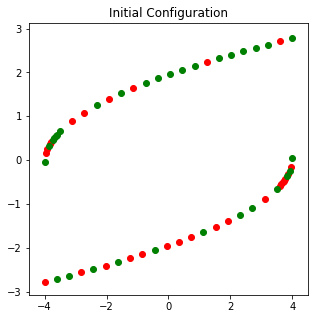

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


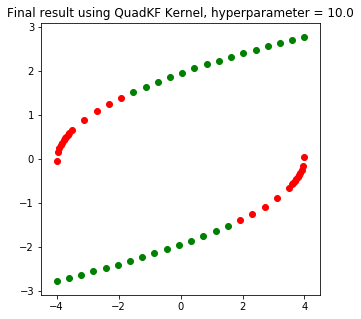

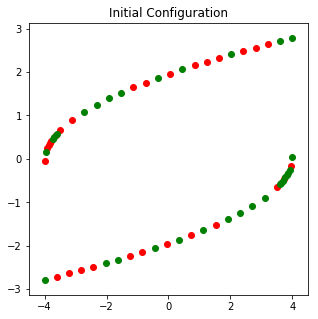

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6


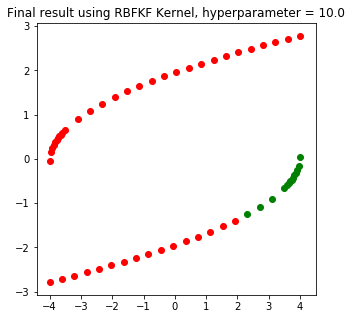

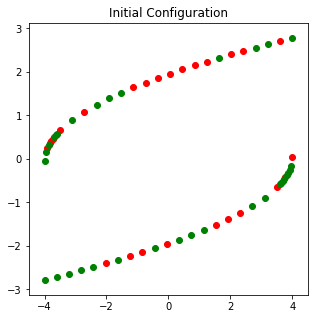

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2


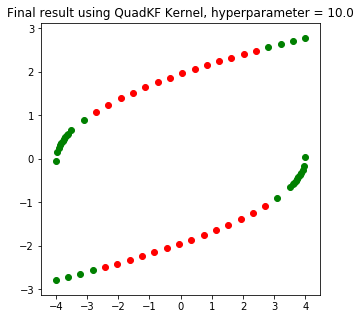

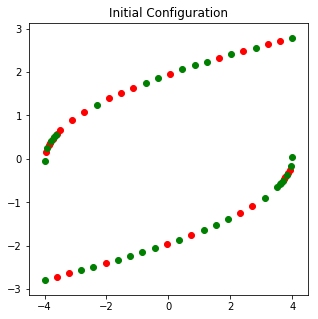

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6
Using RBFKF Kernel. Iteration 7
Using RBFKF Kernel. Iteration 8


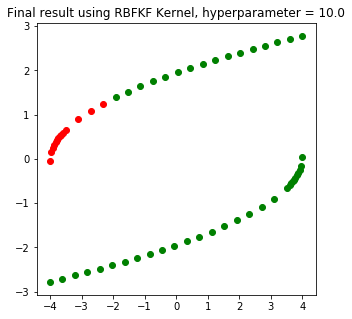

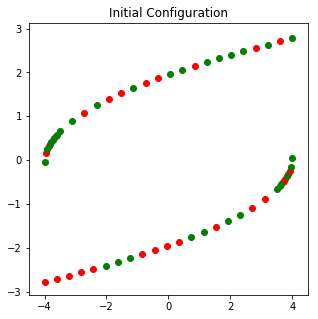

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


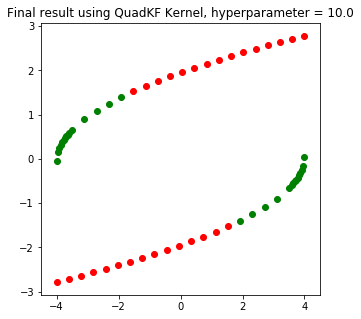

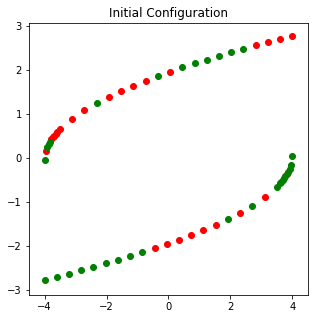

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


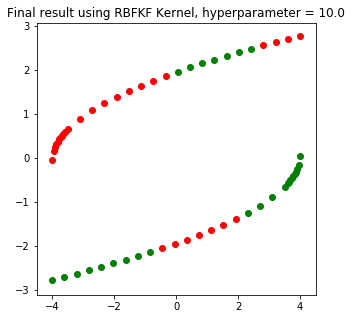

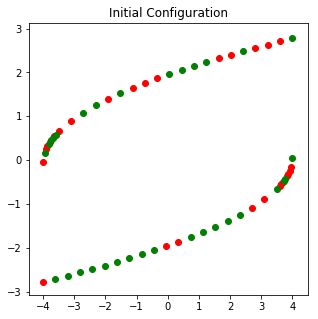

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


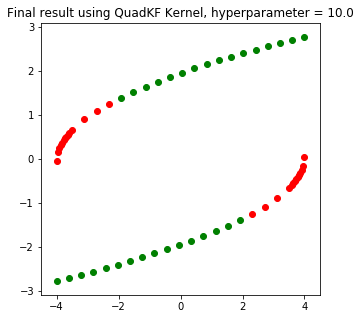

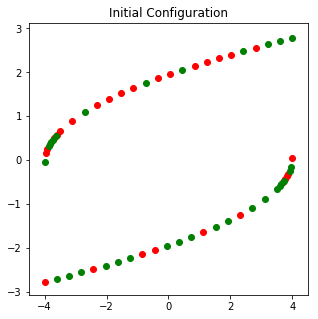

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


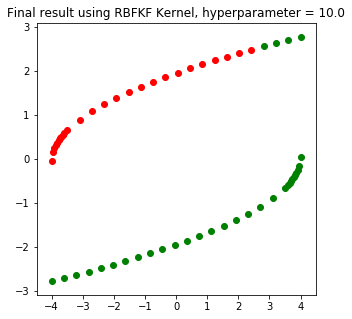

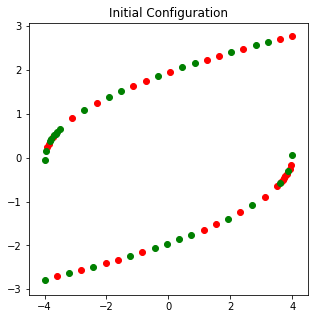

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


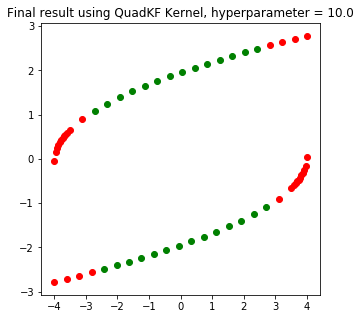

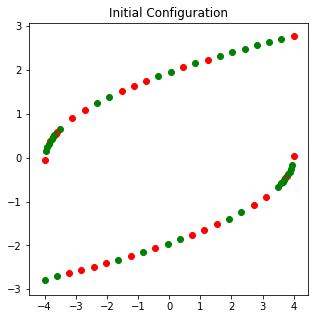

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6
Using RBFKF Kernel. Iteration 7
Using RBFKF Kernel. Iteration 8
Using RBFKF Kernel. Iteration 9


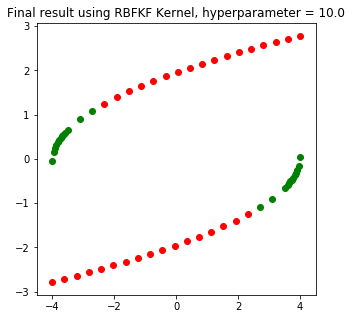

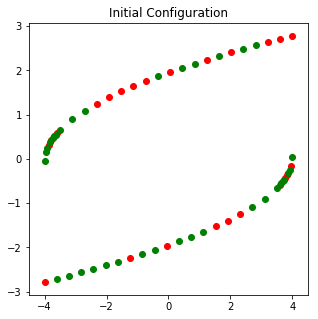

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


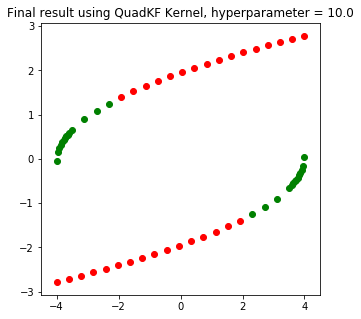

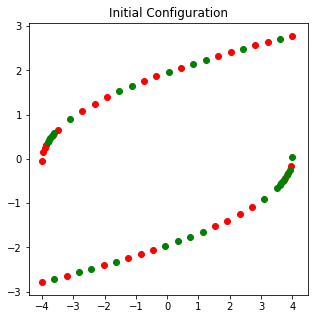

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


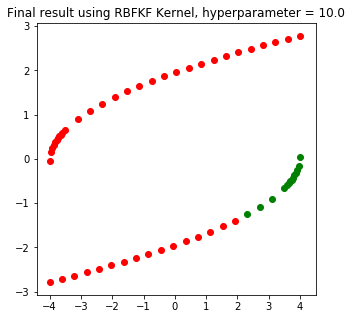

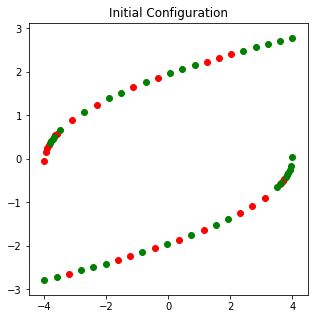

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


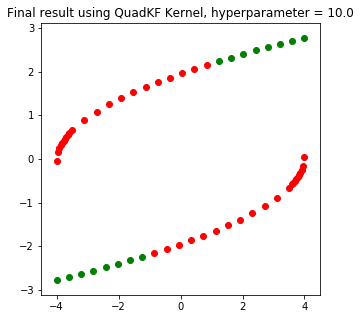

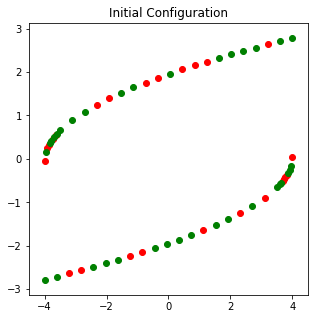

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6


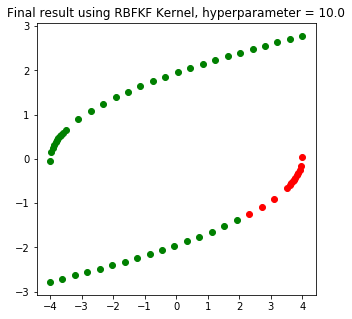

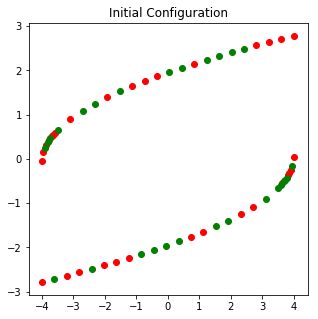

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


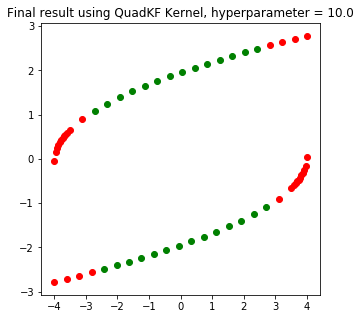

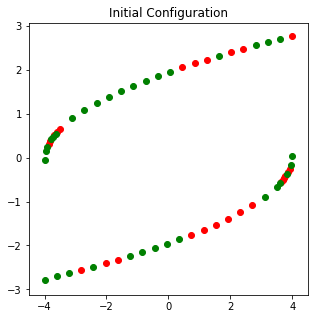

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6
Using RBFKF Kernel. Iteration 7


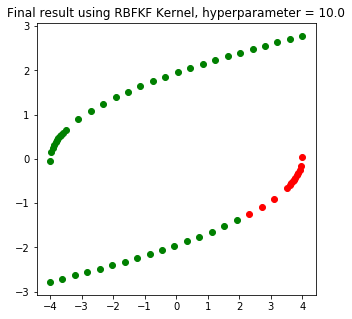

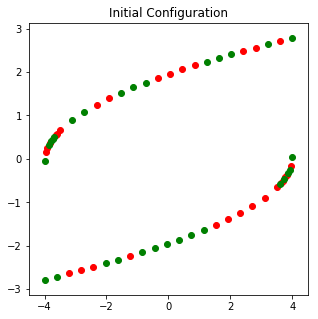

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


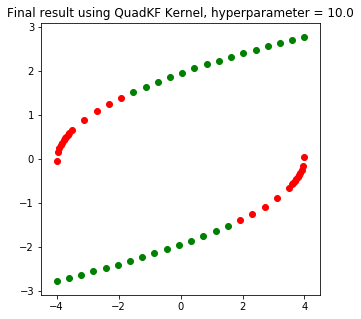

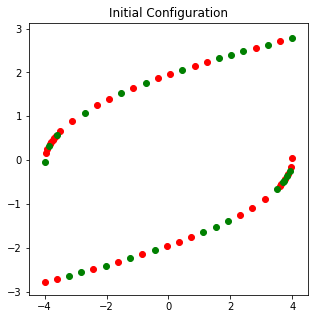

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6
Using RBFKF Kernel. Iteration 7
Using RBFKF Kernel. Iteration 8


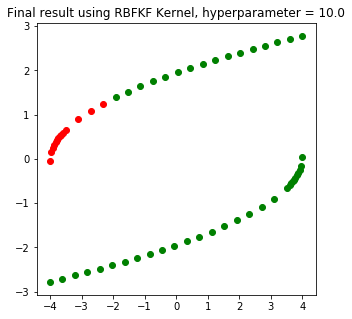

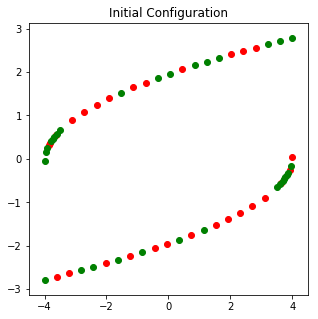

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3


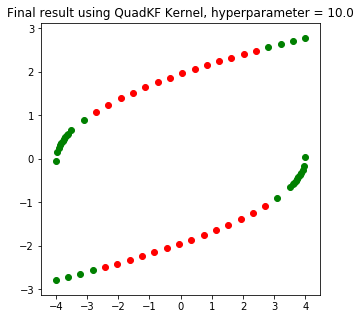

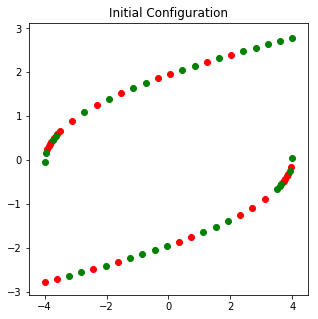

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


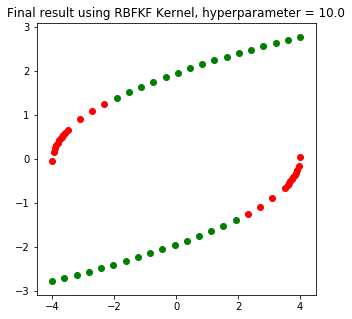

In [71]:
# Question 2c, Part (vi)

print('Example 2 - Two parabolic segments')
for h in range(10):
    KernelizedLloyd(QuadKF, data_ex2, 2, hyperparam = 10.0)
    KernelizedLloyd(RBFKF, data_ex2, 2, hyperparam = 10.0)

Example 3 - Parabolic Clusters


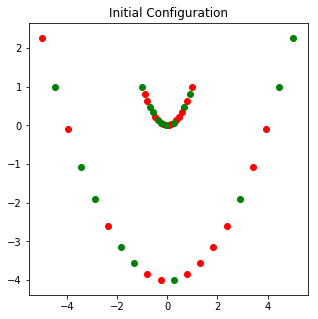

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4
Using QuadKF Kernel. Iteration 5


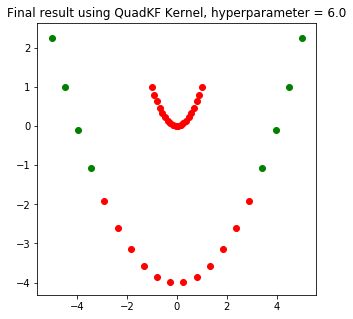

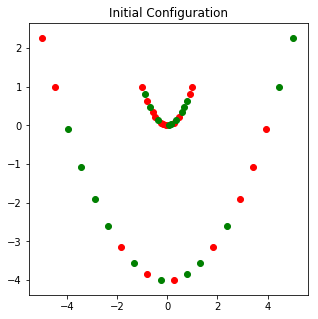

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


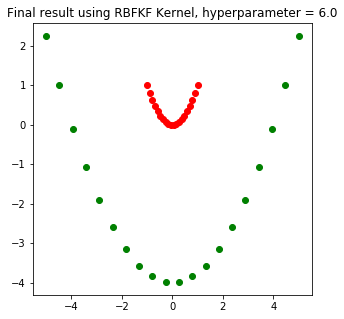

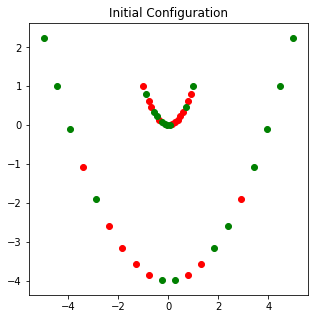

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


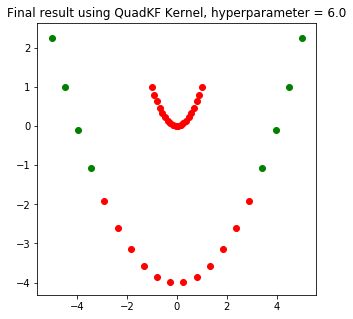

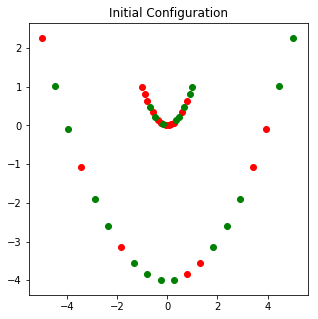

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


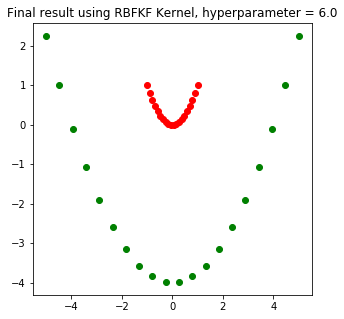

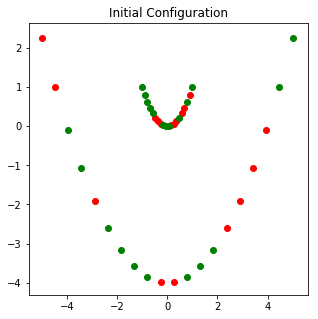

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4
Using QuadKF Kernel. Iteration 5
Using QuadKF Kernel. Iteration 6


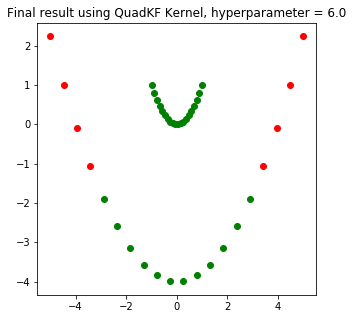

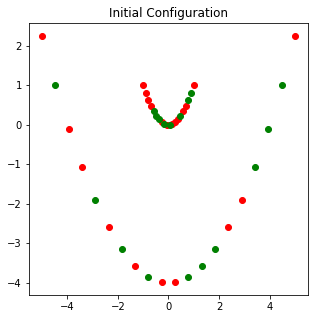

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


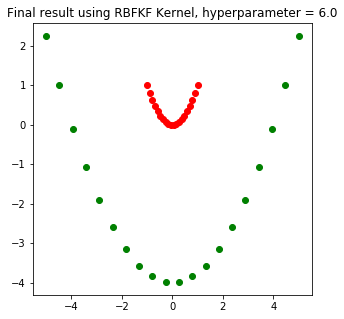

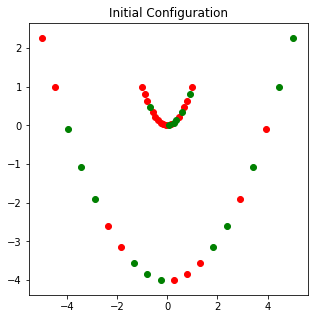

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4
Using QuadKF Kernel. Iteration 5
Using QuadKF Kernel. Iteration 6


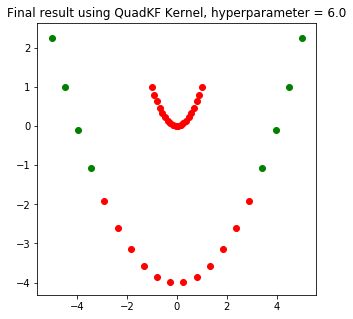

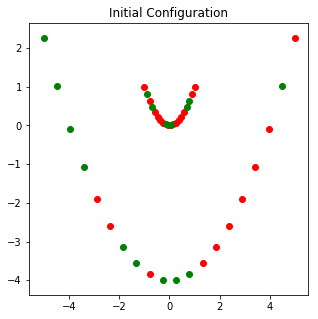

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


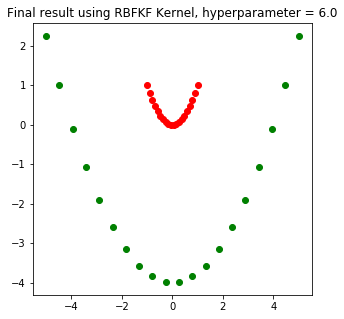

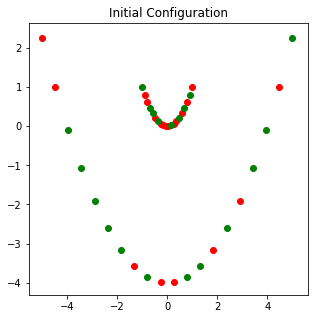

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4
Using QuadKF Kernel. Iteration 5
Using QuadKF Kernel. Iteration 6


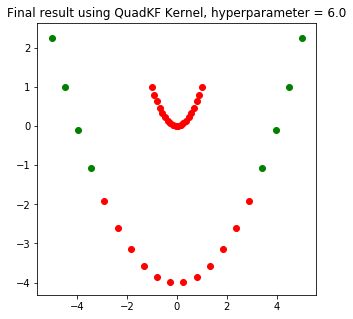

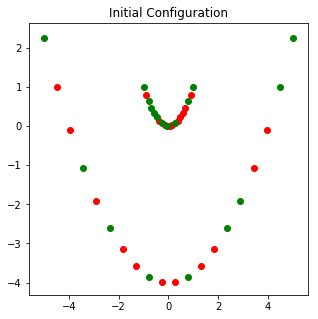

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6
Using RBFKF Kernel. Iteration 7


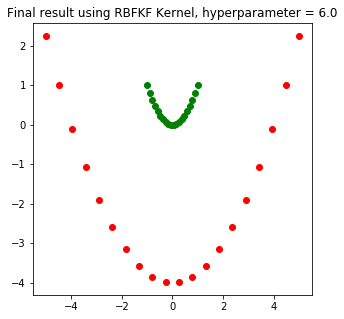

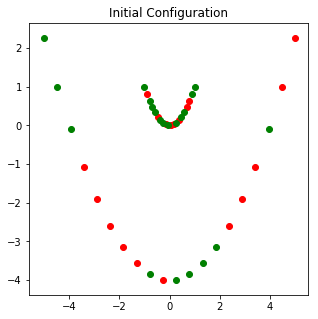

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4
Using QuadKF Kernel. Iteration 5
Using QuadKF Kernel. Iteration 6
Using QuadKF Kernel. Iteration 7


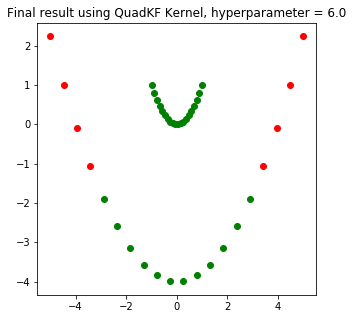

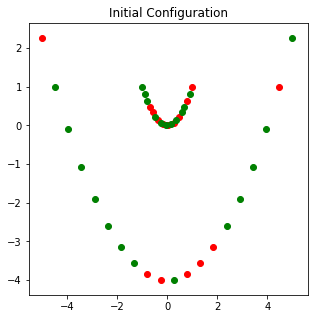

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


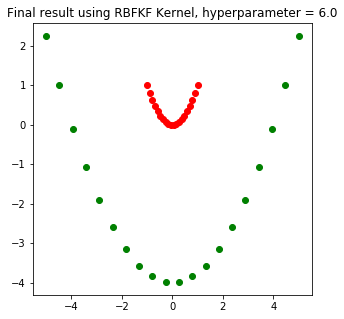

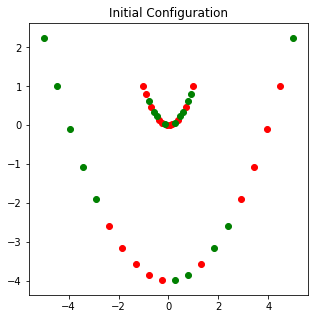

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


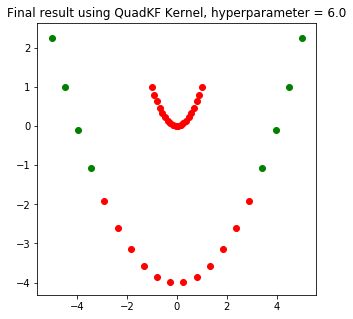

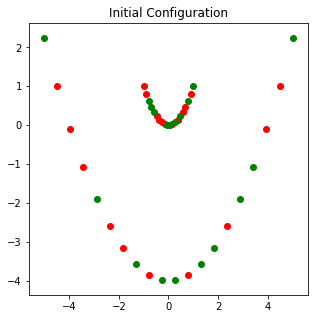

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


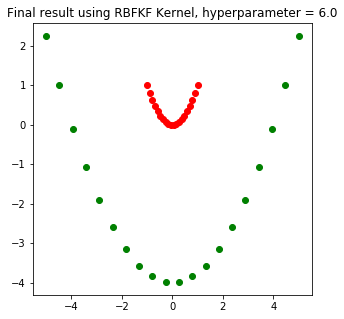

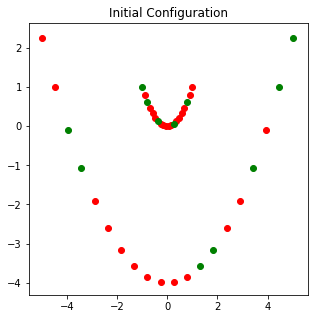

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


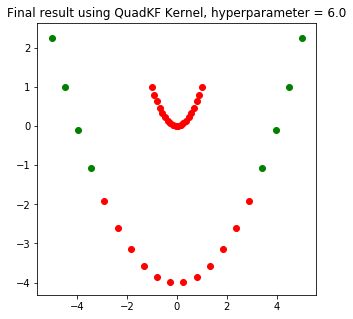

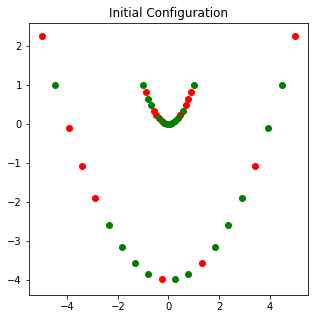

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4
Using RBFKF Kernel. Iteration 5
Using RBFKF Kernel. Iteration 6
Using RBFKF Kernel. Iteration 7
Using RBFKF Kernel. Iteration 8
Using RBFKF Kernel. Iteration 9
Using RBFKF Kernel. Iteration 10


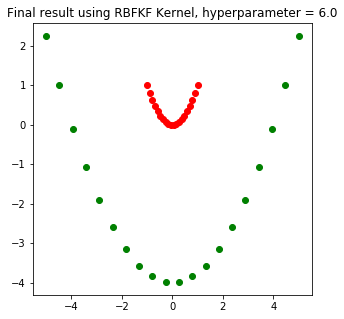

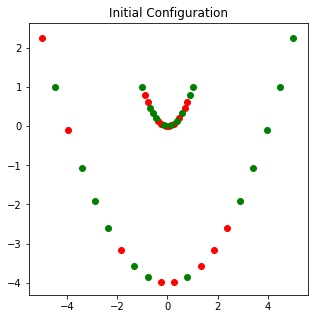

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4
Using QuadKF Kernel. Iteration 5


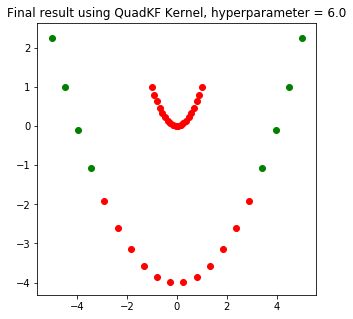

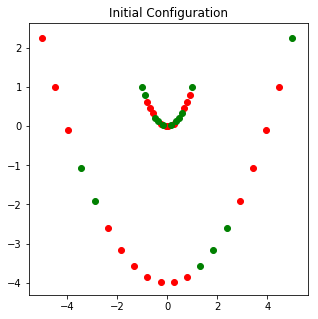

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3


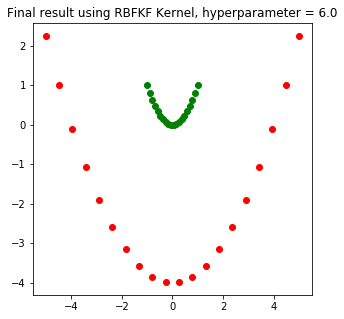

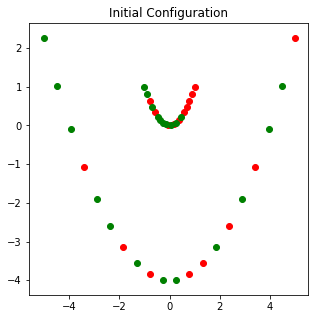

Using QuadKF Kernel. Iteration 1
Using QuadKF Kernel. Iteration 2
Using QuadKF Kernel. Iteration 3
Using QuadKF Kernel. Iteration 4


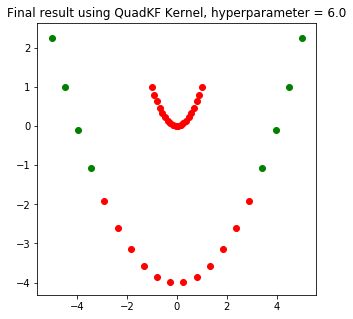

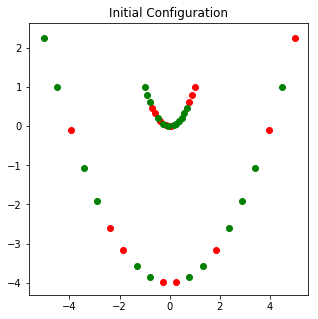

Using RBFKF Kernel. Iteration 1
Using RBFKF Kernel. Iteration 2
Using RBFKF Kernel. Iteration 3
Using RBFKF Kernel. Iteration 4


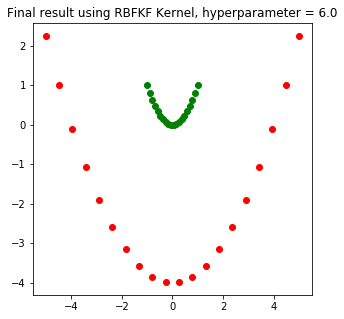

In [72]:
# Question 2c, Part (vi)

print('Example 3 - Parabolic Clusters')
for h in range(10):
    KernelizedLloyd(QuadKF, data_ex3, 2, hyperparam = 6.0)
    KernelizedLloyd(RBFKF, data_ex3, 2, hyperparam = 6.0)